In [ ]:
!pip install wordCloud

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import string
from wordcloud import WordCloud

In [ ]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df_email = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Email_Classification/preprocess_train.csv')

df_email = df_email[['all_text', 'classname', 'Num_words_email']]

df_email = df_email.dropna()

df_email = df_email.groupby('classname').filter(lambda x: len(x) > 1)

df_email['classname_label'] = pd.Categorical(df_email['classname'])

df_email['classname'] = df_email['classname_label'].cat.codes

df_email.head()

,all_text,classname,Num_words_email,classname_label
0,soc mot et al princeton ax matching fund boy s...,0,190,class_1
1,little satanicarticle mangoe charley wingate w...,0,138,class_1
2,theist postingarticle aic khan umar khan write...,0,64,class_1
3,genocide caused atheismnanci ann miller writes...,0,74,class_1
4,anecdote islamarticle jaeger gregg jaeger writ...,0,251,class_1


In [ ]:
print(df_email.isnull().any())
print(df_email.shape)

all_text           False
classname          False
Num_words_email    False
classname_label    False
dtype: bool
(2768, 4)


In [ ]:
print(df_email.drop_duplicates(subset=['all_text'], keep='first', inplace=True))
print(df_email.shape)

None
(2767, 4)


In [ ]:
print(df_email['Num_words_email'].describe())

count    2767.000000
mean      156.239610
std       366.313035
min         1.000000
25%        54.000000
50%        89.000000
75%       151.000000
max      6090.000000
Name: Num_words_email, dtype: float64


<Figure size 1440x1440 with 0 Axes>

0        0
1        0
2        0
3        0
4        0
        ..
2763    19
2764    19
2765    19
2766    19
2767    19
Name: classname, Length: 2767, dtype: int8

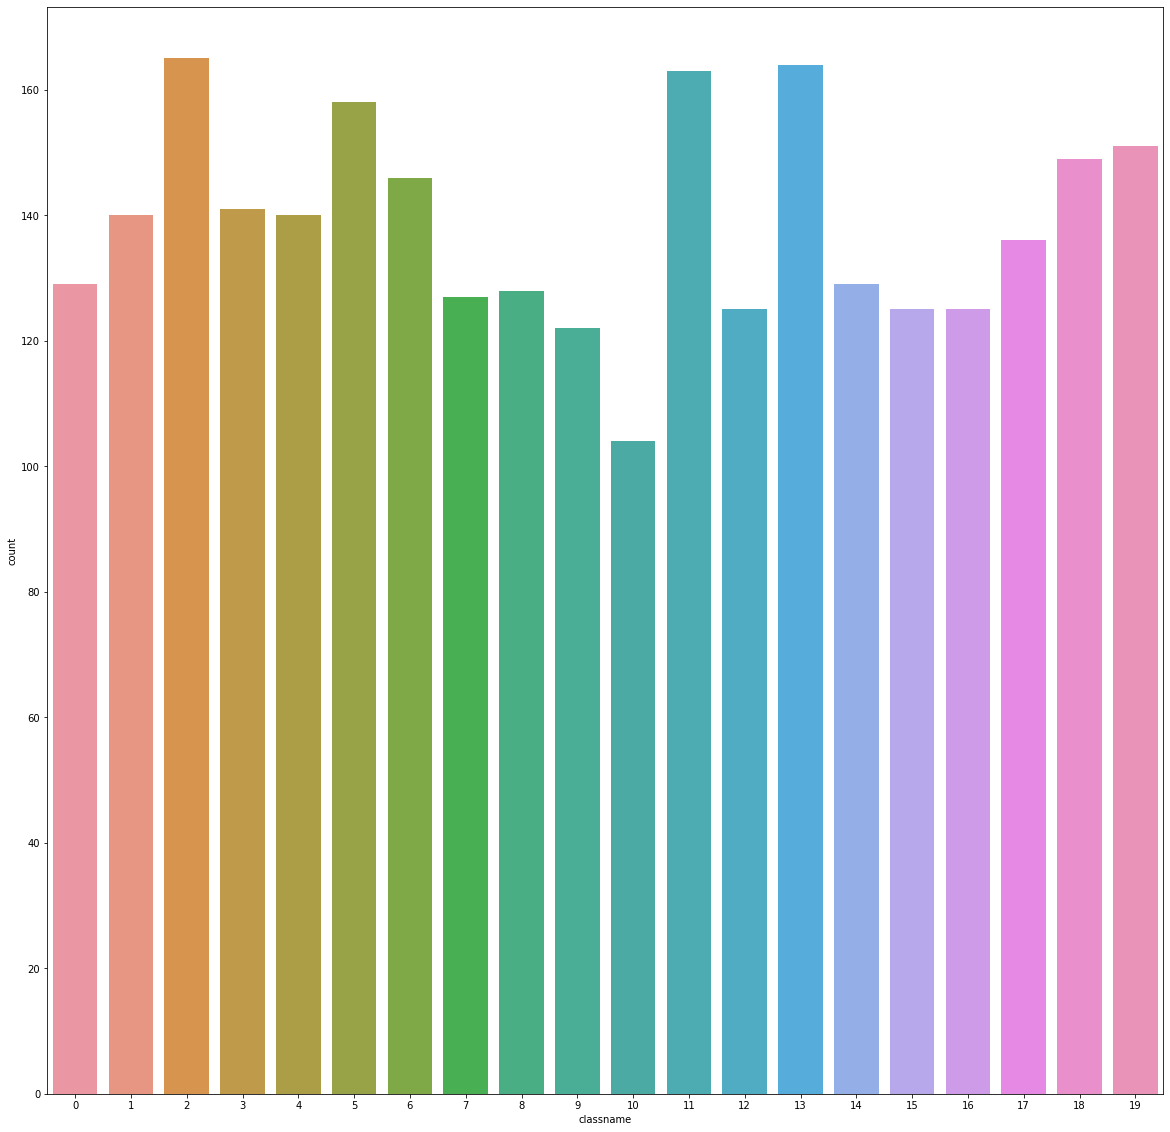

In [ ]:
plt.figure(figsize=(20,20))

sns.countplot(x=df_email['classname'], data=df_email)

df_email['classname']

In [ ]:
df_email.groupby('classname').count()

,all_text,Num_words_email,classname_label
classname,,,
0,129,129,129
1,140,140,140
2,165,165,165
3,141,141,141
4,140,140,140
5,158,158,158
6,146,146,146
7,127,127,127
8,128,128,128


In [ ]:
df_email_class = df_email.groupby('classname').filter(lambda x: len(x) > 125)
df_email_class_group = df_email_class.groupby('classname')

In [ ]:
print("len(df_email_class))
print(len(df_email_class_group))

2166
15


In [ ]:
sns.countplot(y='classname', hue='Num_words_email', data=df_email)

In [ ]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
mask = (df_email['Num_words_email'] <= 25)
df_emailwords25 = df_email[mask]

mask = (df_email['Num_words_email'] >= 25) & (df_email['Num_words_email'] < 50)
df_emailwords50 = df_email[mask]

mask = (df_email['Num_words_email'] >= 50) & (df_email['Num_words_email'] < 100)
df_emailwords100 = df_email[mask]

mask = (df_email['Num_words_email'] >= 100) & (df_email['Num_words_email'] < 150)
df_emailwords150 = df_email[mask]

mask = (df_email['Num_words_email'] >= 150) & (df_email['Num_words_email'] < 200)
df_emailwords200 = df_email[mask]

mask = (df_email['Num_words_email'] >= 200) & (df_email['Num_words_email'] < 500)
df_emailwords500 = df_email[mask]

mask = (df_email['Num_words_email'] >= 500)
df_emailwordsgreater500 = df_email[mask]

wordsunder500 = len(df_emailwords25) + len(df_emailwords50) + len(df_emailwords100) + len(df_emailwords150) + len(df_emailwords200) + len(df_emailwords500)

print('Total emails: ', len(df_email))
print('Email with words under 500: ', wordsunder200)
percent = (wordsunder200 / len(df_email)) * 100
print('Percentage of Email with words under 500: ',percent)

print('Email with words greater than 500:', len(df_emailwordsgreater500))

Total emails:  2767
Email with words under 500:  2599
Percentage of Email with words under 500:  93.92844235634261
Email with words greater than 500: 100


<Figure size 1440x1440 with 0 Axes>

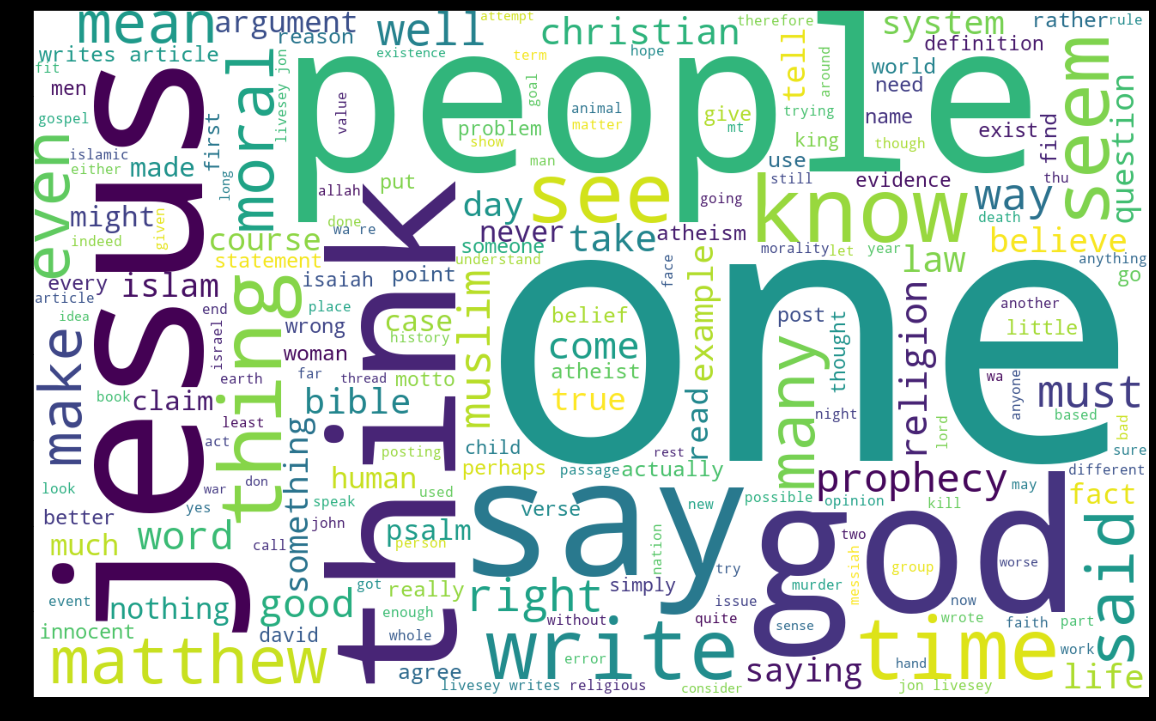

In [ ]:
wordcloud = WordCloud(background_color='white', width=1300, height=800).generate(' '.join(df_email['all_text'][df_email['classname_label'] == 'class_1'].tolist()))
plt.figure(figsize=(20,20), facecolor='k')
plt.imshow(wordcloud)

<Figure size 1440x1440 with 0 Axes>

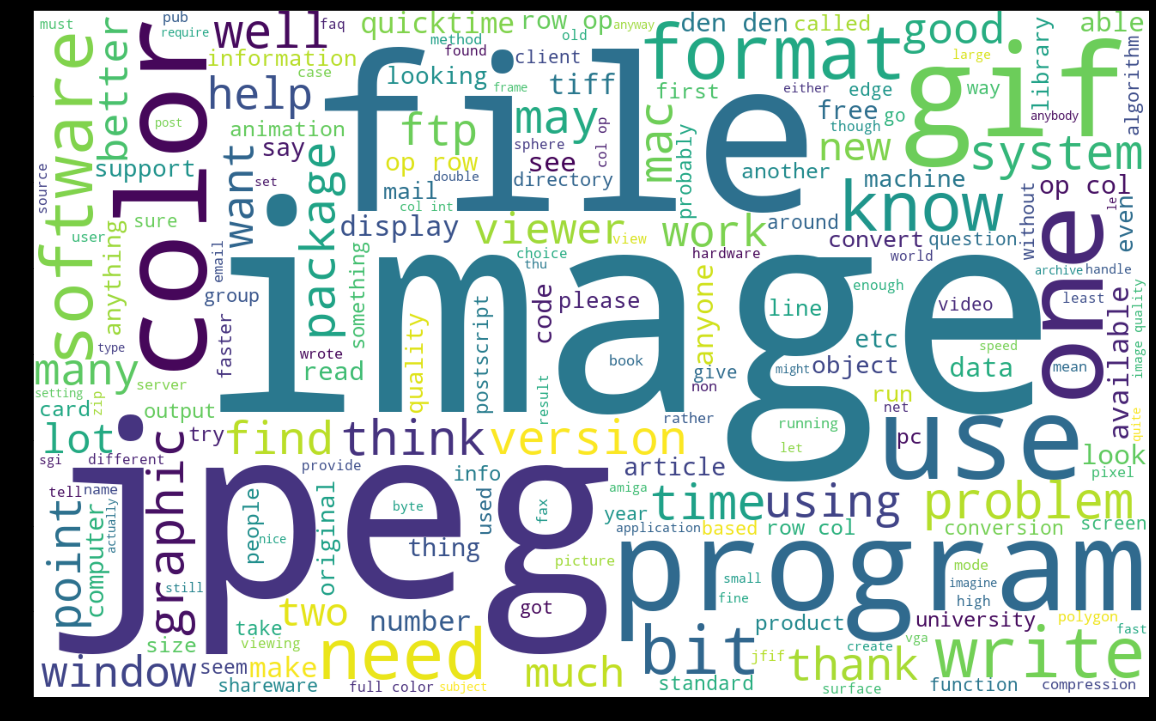

In [ ]:
wordcloud = WordCloud(background_color='white', width=1300, height=800).generate(' '.join(df_email['all_text'][df_email['classname_label'] == 'class_2'].tolist()))
plt.figure(figsize=(20,20), facecolor='k')
plt.imshow(wordcloud)